# Data Science Job Salaries Exploration

## by **SALMAN FARI**

## Introduction
This data set includes information about salaries of jobs in the data science domain. This notebook is going to explore the dataset to find out insights about the jobs and salaries. 

## The Data
The dataset contains 12 columns. There is salary column, salary in usd column, experience level, company location.... The dataset was download from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries).
<li>work_year:	The year the salary was paid.
<li>experience_level:	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
<li>employment_type:	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
<li>job_title:	The role worked in during the year.
<li>salary:	The total gross salary amount paid.
<li>salary_currency:	The currency of the salary paid as an ISO 4217 currency code.
<li>salaryinusd:	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
<li>employee_residence:	Employee's primary country of residence in during the work year as an ISO 3166 country code.
<li>remote_ratio:	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
<li>company_location:   The country of the employer's main office or contracting branch as an ISO 3166 country code.
<li>company_size:   The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns


In [2]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Assessing Data
## Visual Assessment

In [4]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## Programmatic Assessment

In [5]:
#Check for the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
#To display four digit in float numbers
pd.options.display.float_format = '{:.4f}'.format

In [7]:
#descriptive information of the salary column
df.salary.describe()

count        607.0000
mean      324000.0626
std      1544357.4866
min         4000.0000
25%        70000.0000
50%       115000.0000
75%       165000.0000
max     30400000.0000
Name: salary, dtype: float64

In [8]:
#descriptive information of the salary_in_usd column
df.salary_in_usd.describe()

count      607.0000
mean    112297.8699
std      70957.2594
min       2859.0000
25%      62726.0000
50%     101570.0000
75%     150000.0000
max     600000.0000
Name: salary_in_usd, dtype: float64

In [9]:
#ceck for null values 
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
#check for duplicated values
df.duplicated().sum()

42

# Data Cleaning
Quality Issues
<li> There are duplicated values
<li> some columns expressions are not written in full: experience_level, remote_ratio, company_size, employment_type
<li> experience_level, remote_ratio company_size is not in categorical format
<li> Some rows have ML Engineer while others have Machine learning Engineer in job_title column
<li> majority of employee_residence column have very less frequency of values.

 <br>

Tidiness Issues
<li> There is no employee residende currency column


In [11]:
#copy dataset
df_clean = df.copy()

# Cleaning Quality Issues

## `Q1`: There are duplicate values
### Define
drop duplicate


### Code

In [12]:
df_clean.drop_duplicates(inplace=True)

### Test

In [13]:
df_clean.duplicated().sum()

0

## `Q2`: some columns expressions are not written in full: experience_level, remote_ratio, company_size
### Define
change the expressions to their dull meaning

### Code

In [14]:
df_clean.experience_level.replace(['EN', 'MI', 'SE', 'EX'], ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level'], inplace=True)

In [15]:
df_clean.remote_ratio.replace([100, 50, 0], ['Remote', 'Hybrid', 'On-site'], inplace=True)

In [16]:
df_clean.company_size.replace(['M', 'L', 'S'], ['Medium', 'Large', 'Small'], inplace=True)

In [17]:
df_clean.employment_type = df_clean.employment_type.replace(['FT','PT','CT','FL'], ['Full-time', 'Part-time', 'Contract', 'Freelance'])

### Test

In [18]:
df_clean.experience_level.value_counts()

Senior-level       243
Mid-level          208
Entry-level         88
Executive-level     26
Name: experience_level, dtype: int64

In [19]:
df_clean.remote_ratio.value_counts()

Remote     346
On-site    121
Hybrid      98
Name: remote_ratio, dtype: int64

In [20]:
df_clean.company_size.value_counts()

Medium    290
Large     193
Small      82
Name: company_size, dtype: int64

In [21]:
df_clean.employment_type.value_counts()

Full-time    546
Part-time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

## `Q3`: experience_level, remote_ratio company_size is not in categorical format
### Define 
change columns datatype tp categorical

### Code

In [22]:
df_clean.experience_level = df_clean.experience_level.astype('category')
df_clean.remote_ratio = df_clean.remote_ratio.astype('category')
df_clean.company_size = df_clean.company_size.astype('category')

### Test

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           565 non-null    int64   
 1   experience_level    565 non-null    category
 2   employment_type     565 non-null    object  
 3   job_title           565 non-null    object  
 4   salary              565 non-null    int64   
 5   salary_currency     565 non-null    object  
 6   salary_in_usd       565 non-null    int64   
 7   employee_residence  565 non-null    object  
 8   remote_ratio        565 non-null    category
 9   company_location    565 non-null    object  
 10  company_size        565 non-null    category
dtypes: category(3), int64(3), object(5)
memory usage: 41.8+ KB


## `Q4`: Some rows have ML Engineer while others have Machine learning Engineer in job_title column
### Define 
Change all rows that have ML Engineer to Machine Learning Engineer

### Code

In [24]:
df_clean.job_title.replace(['ML Engineer'], ['Machine Learning Engineer'], inplace=True)

### Test

In [25]:
df_clean.job_title.value_counts()

Data Scientist                              130
Data Engineer                               121
Data Analyst                                 82
Machine Learning Engineer                    45
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Data Analytics Manager                        7
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                                  5
Applied Data Scientist                  

## `Q4`: majority of employee_residence column have very less frequency of values.
### Define
change the values with less frequency to others

## Code

In [26]:
df_clean.loc[df['employee_residence'].map(df['employee_residence'].value_counts(normalize=True).lt(0.03)), 'employee_residence'] = 'Others'

## Test

In [27]:
df_clean.employee_residence.value_counts()

US        295
Others    146
GB         43
IN         30
CA         27
DE         24
Name: employee_residence, dtype: int64

# Cleaning Tidiness Issues

## `T1`: There is no employee residence currency column
### Define
create employee residence currency column column 

### Code

In [28]:
##Mapping country currencies

country_currency = {
	'DE': 'EUR',
	'JP': 'JPY',
	'GB': 'GBP',
	'HN': 'HNL',
	'US': 'USD',
	'HU': 'HUF',
    'NZ': 'NZD',
    'FR': 'EUR', 
    'IN': 'INR',
    'PK': 'PKR',
    'PL': 'PLN',
    'PT': 'EUR',
    'CN': 'CNY',
    'GR': 'EUR',
    'AE': 'AED',
    'NL': 'EUR',
    'MX': 'MXN',
    'CA': 'CAD',
    'AT': 'EUR',
    'NG': 'NGN',
    'PH': 'PHP',
    'ES': 'EUR',
    'DK': 'DKK',
    'RU': 'RUB',
    'IT': 'EUR',
    'HR': 'HRK',
    'BG': 'BGN',
    'SG': 'SGD',
    'BR': 'BRL',
    'IQ': 'IQD',
    'VN': 'VND',
    'BE': 'EUR',
    'UA': 'UAH',
    'MT': 'EUR',
    'CL': 'CLP',
    'RO': 'RON',
    'IR': 'IRR',
    'CO': 'COP',
    'MD': 'MDL',
    'KE': 'KES',
    'SI': 'SIT',
    'HK': 'HKD',
    'TR': 'TRY',
    'RS': 'RSD',
    'PR': 'USD',
    'LU': 'EUR',
    'JE': 'GBP',
    'CZ': 'CZK',
    'AR': 'ARS',
    'DZ': 'DZD',
    'TN': 'TND',
    'MY': 'MYR',
    'EE': 'EUR',
    'AU': 'AUD',
    'BO': 'BOB',
    'IE': 'EUR',
    'CH': 'CHF'
}

df_clean['employee_residence_currency'] = df_clean['employee_residence'].map(country_currency)

In [29]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_currency
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,On-site,DE,Large,EUR
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,Others,On-site,JP,Small,NaN
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium,GBP
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,Others,On-site,HN,Small,NaN
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large,USD


# Store Data

In [30]:
df_clean.to_csv('clean_ds_salaries.csv', index=False)

# Univariate Exploration

In [31]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_currency
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,On-site,DE,Large,EUR
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,Others,On-site,JP,Small,NaN
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium,GBP
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,Others,On-site,HN,Small,NaN
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large,USD


In [32]:
#Create a function to plot the title and label of a plot
def x_y_t(xL,yL,title):
    plt.title(title, fontweight='bold', fontsize='14')
    plt.xlabel(xL, fontweight='bold')
    plt.ylabel(yL, fontweight='bold')
color = sns.color_palette()[0]

### What is the distribution of Experience Level??

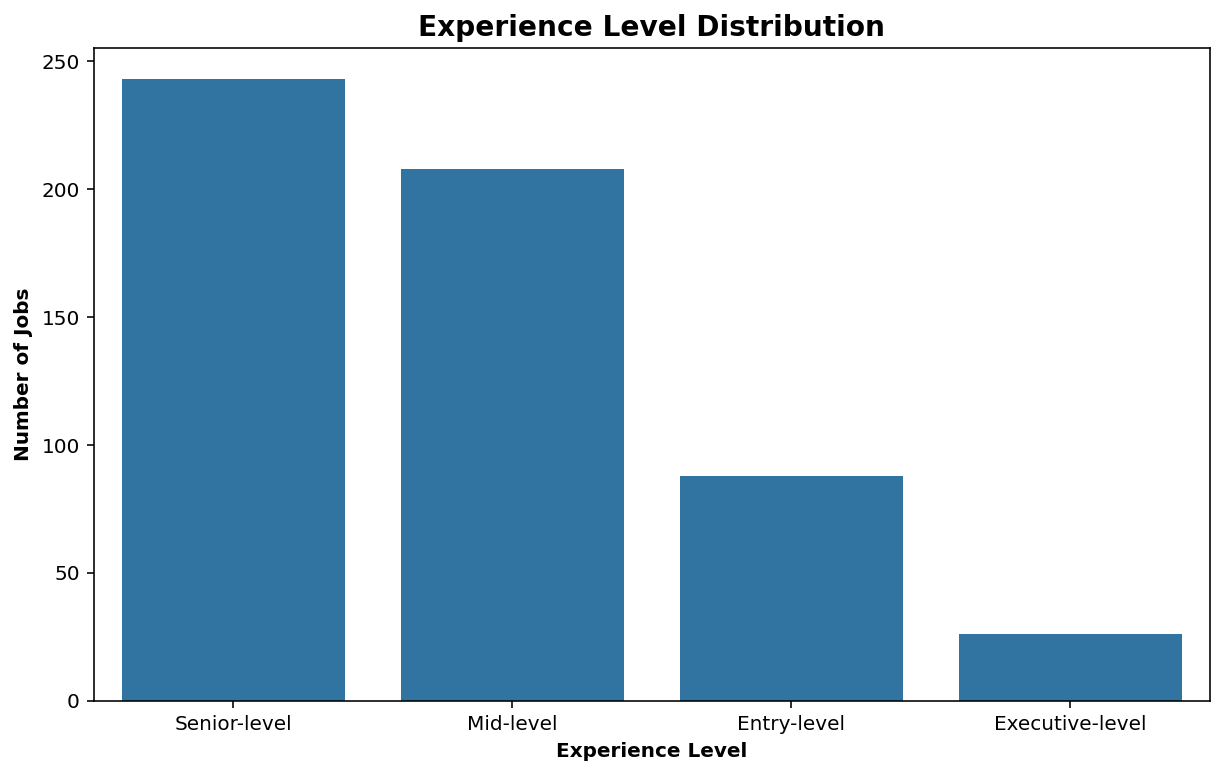

In [33]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.experience_level.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, x='experience_level', order=order, color=color);
x_y_t('Experience Level', 'Number of Jobs', 'Experience Level Distribution')

Senior level roles are the highest jobs follow by mid-level. Executive level role is the lowest 

### What is the distribution of Employment Type?

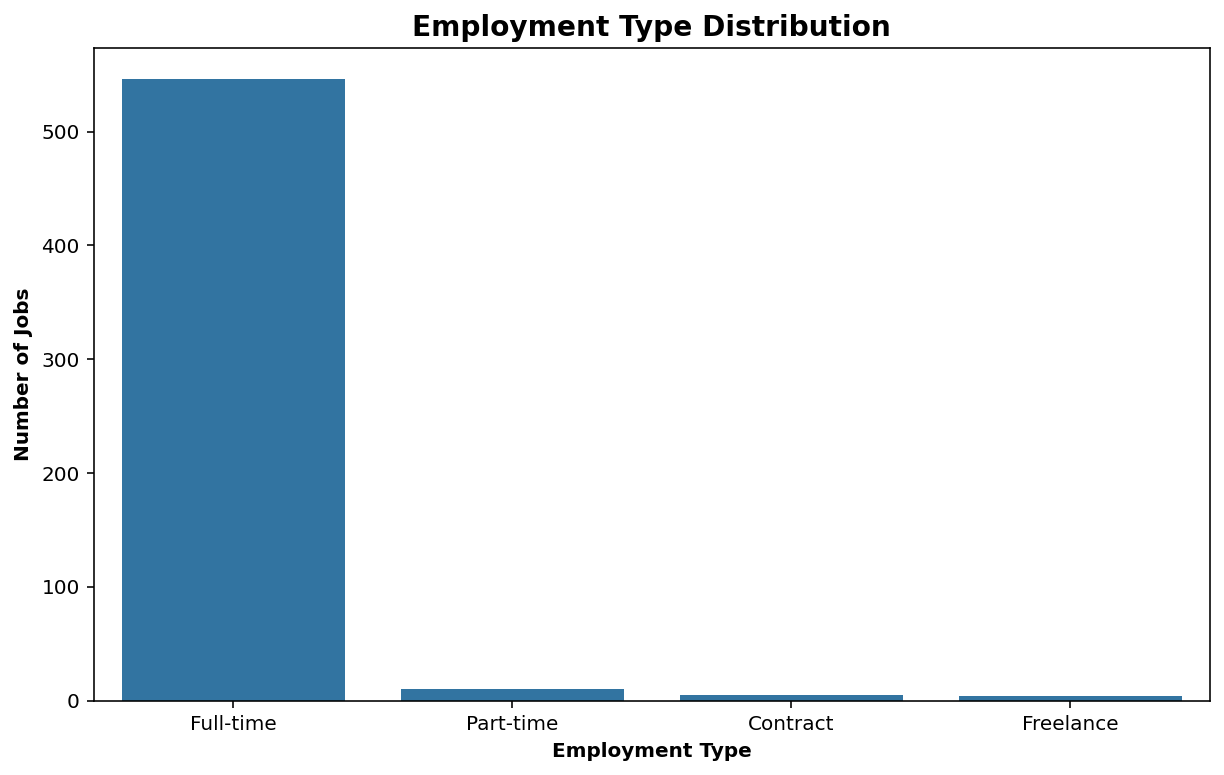

In [34]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.employment_type.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `employment type`
sns.countplot(data=df_clean, x='employment_type', order=order, color=color);
x_y_t('Employment Type', 'Number of Jobs', 'Employment Type Distribution')

Full time employment is the highest followed by Part time. Contract and Freelance are almost the same.

### What are the most popular Jobs in Data Science?

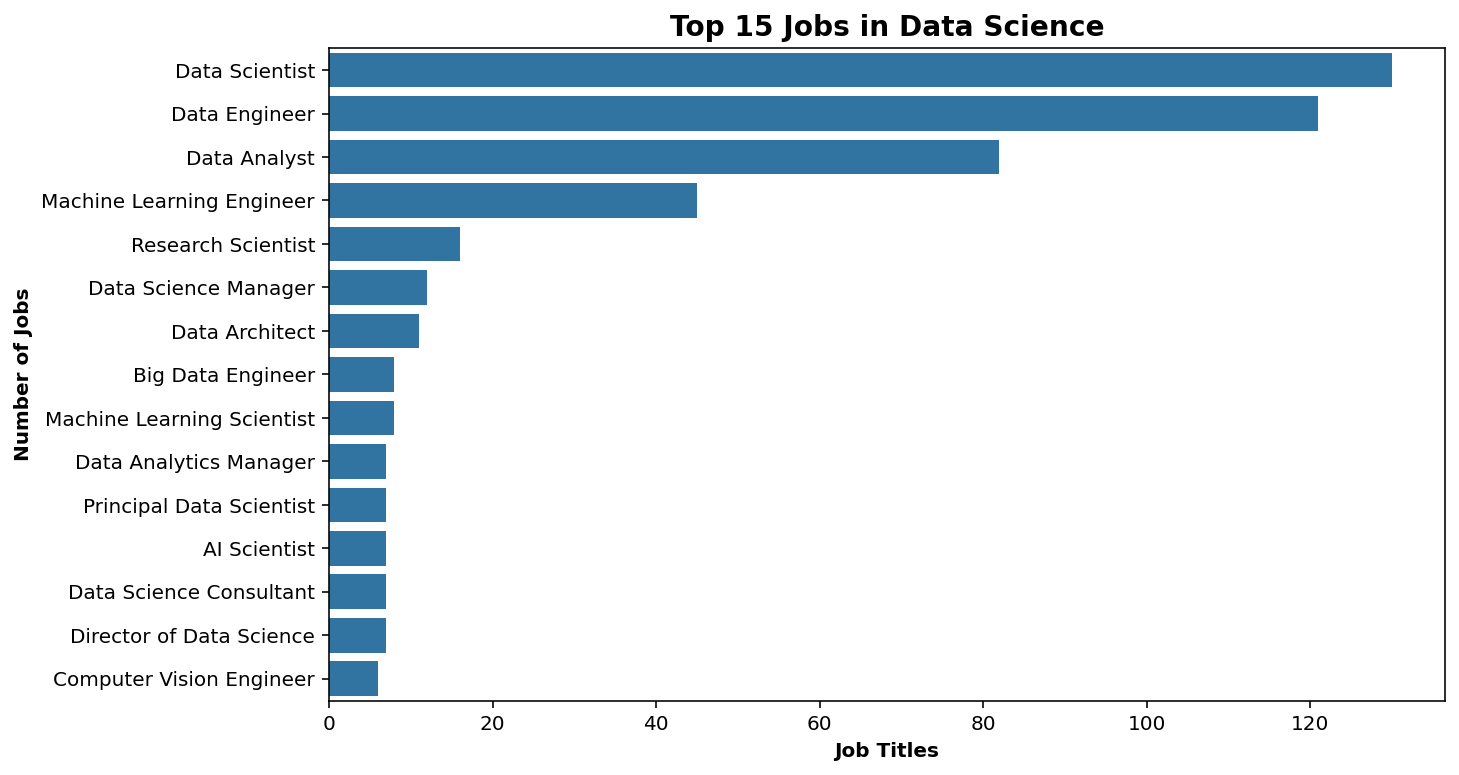

In [35]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.job_title.value_counts().head(15).index

# Plot the bar chart in the decreasing order of the frequency of the `user_type`
sns.countplot(data=df_clean, y='job_title', order=order, color=color);
x_y_t('Job Titles', 'Number of Jobs', 'Top 15 Jobs in Data Science')

Data Scientist is the most popular job in Data science

# What is the distribution of Remote Ratio?

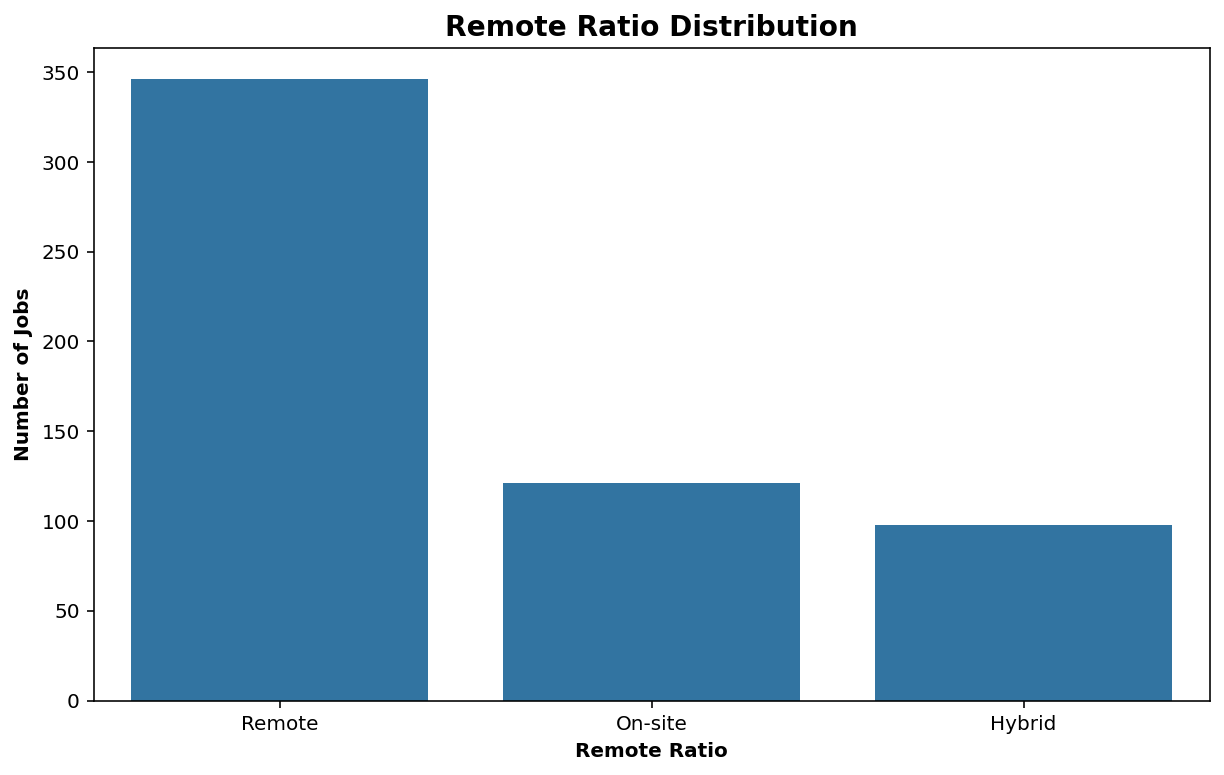

In [36]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.remote_ratio.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `employment type`
sns.countplot(data=df_clean, x='remote_ratio', order=order, color=color);
x_y_t('Remote Ratio', 'Number of Jobs', 'Remote Ratio Distribution')

Most jobs in data science is remote.

# What is the distribution of Work Year

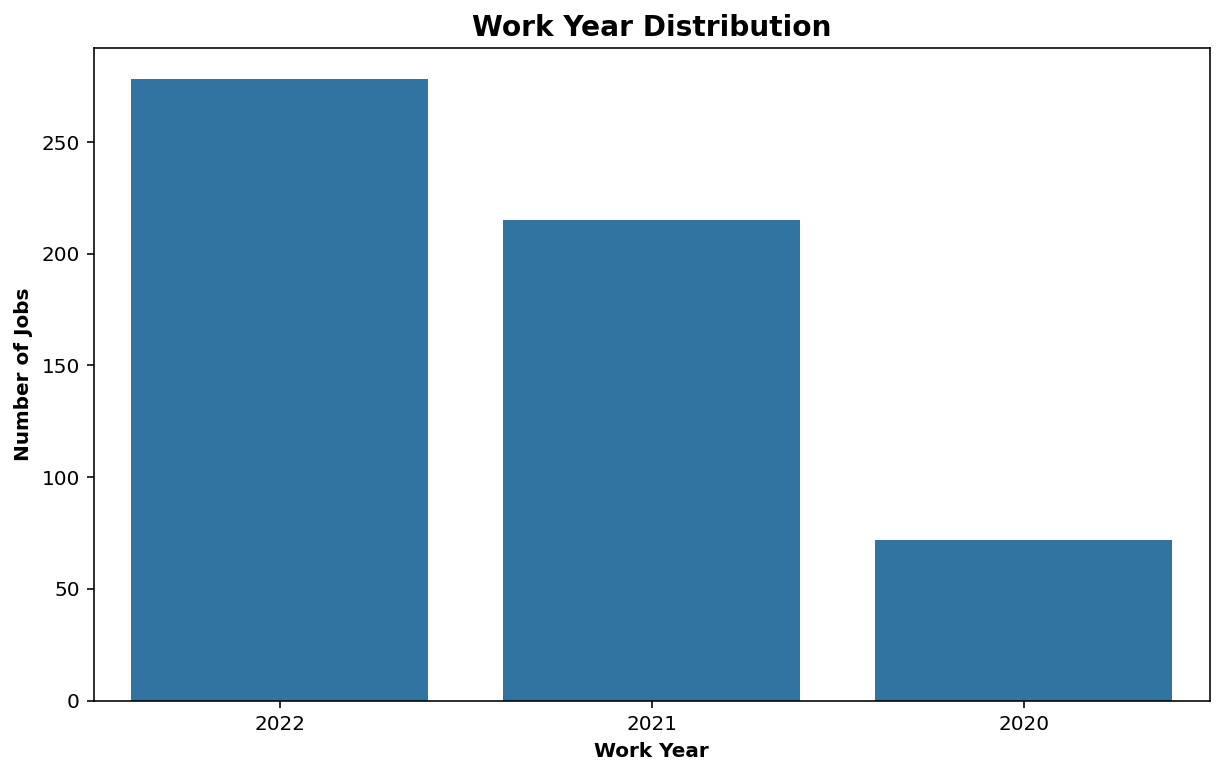

In [37]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.work_year.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `employment type`
sns.countplot(data=df_clean, x='work_year', order=order, color=color);
x_y_t('Work Year', 'Number of Jobs', 'Work Year Distribution')

Most jobs are in 2022

# What is the Salary distribution in USD?

/Users/salman/opt/anaconda3/envs/udacity/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


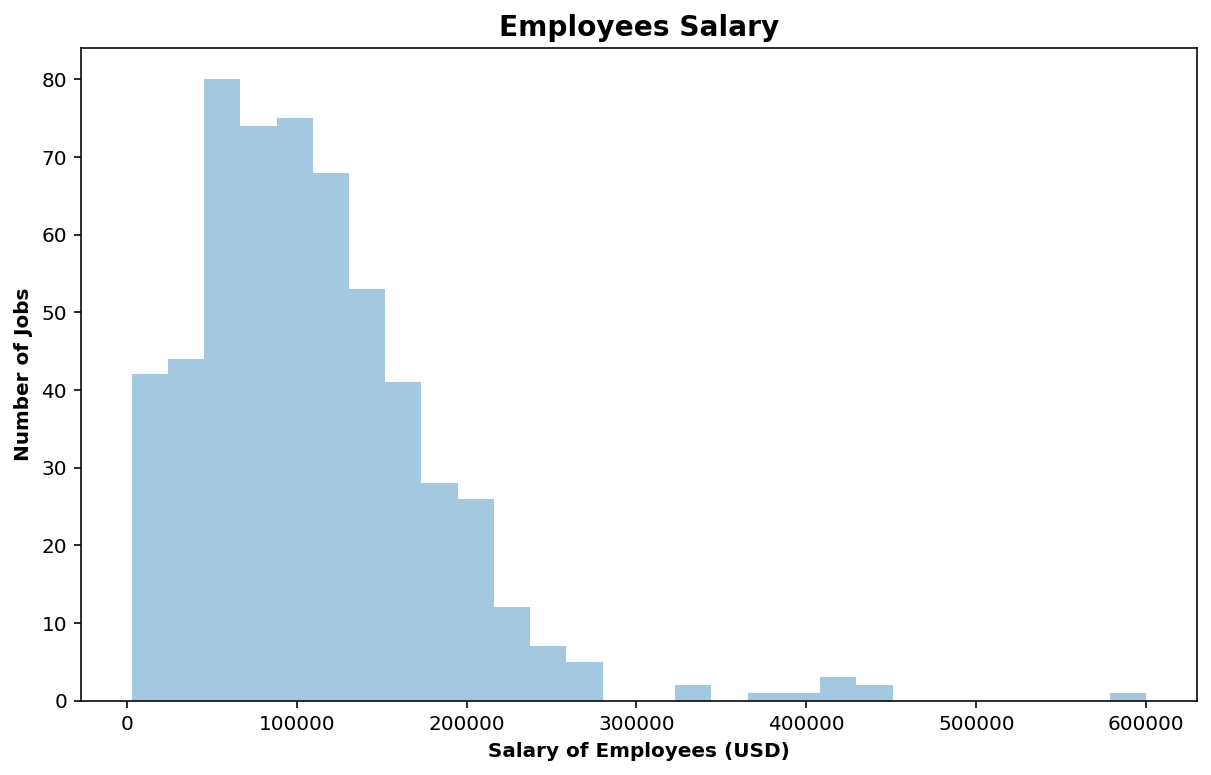

In [38]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the distplot of salary_in_usd
sns.distplot(x = df_clean.salary_in_usd, kde=False)
x_y_t('Salary of Employees (USD)', 'Number of Jobs', 'Employees Salary')

The employee salary in usd is right skewed.

# What is the distribution of Company Size?

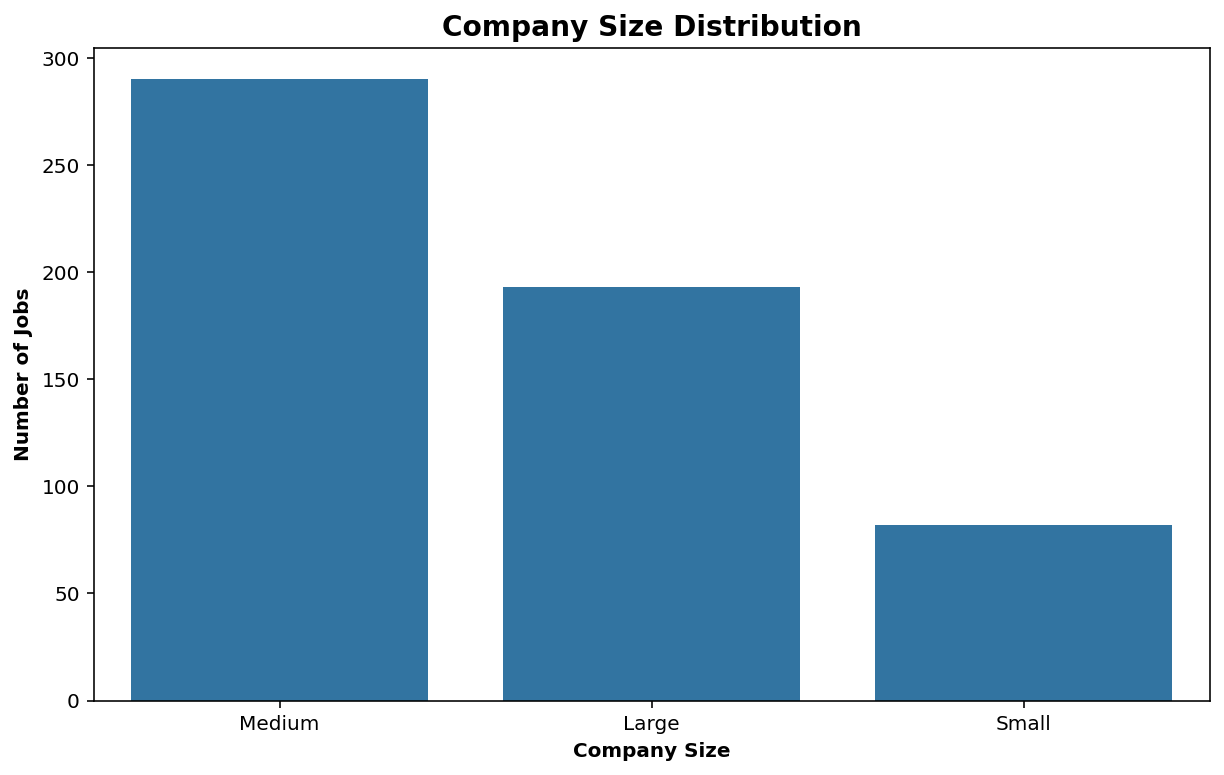

In [39]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.company_size.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `employment type`
sns.countplot(data=df_clean, x='company_size', order=order, color=color);
x_y_t('Company Size', 'Number of Jobs', 'Company Size Distribution')

Most company's size is medium

# Observation
<li> Most Experience level needed in a company are Senior-level and Mid-level
<li> Most job type is Full-time and then few jobs are part-time which. Contract and freelance are almost the same which makes sense because freelance and contract are temporary employment type.
<li> Majority of the jobs are remote which means that all these companies are flexible and it can almost be due to covid.
<li> Majority of the salaries were paid in 2022
<li> Majority of the salary in usd lies between 15000 and 100000
<li> Majority of the companies are medium size companies



# Bivariate Exploration 

In [40]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_currency
0,2020,Mid-level,Full-time,Data Scientist,70000,EUR,79833,DE,On-site,DE,Large,EUR
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,USD,260000,Others,On-site,JP,Small,NaN
2,2020,Senior-level,Full-time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium,GBP
3,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,Others,On-site,HN,Small,NaN
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large,USD


## Is there a relationship between Experience level and Salary (USD)

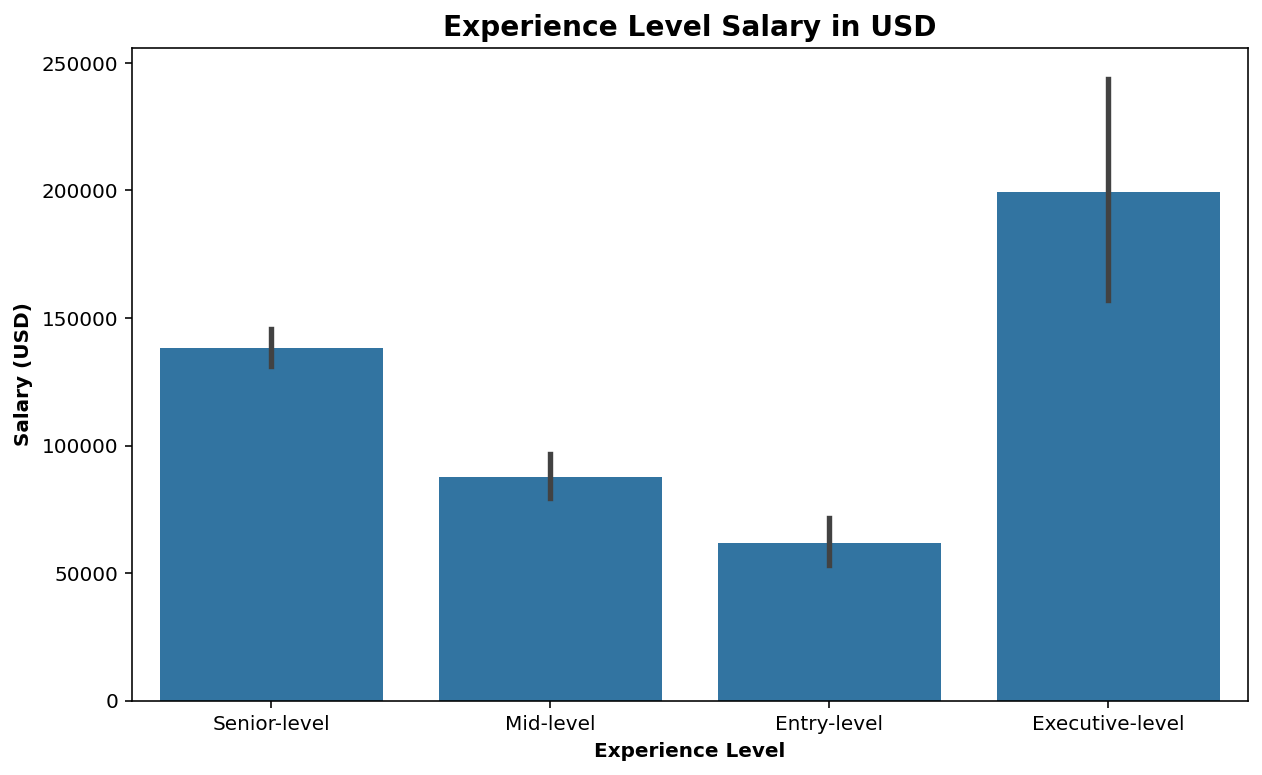

In [41]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.experience_level.value_counts().index
# Plot the bar chart of `experience_level` and 'salary_in_usd'
sns.barplot(data=df_clean, x='experience_level', y='salary_in_usd', color=color, order=order);
#set the title and label
x_y_t('Experience Level', 'Salary (USD)', 'Experience Level Salary in USD')

As experience level is increasing so is salary. There are also a lot of variations in executive level experience

## Is there a relationship between Remote Ratio and Salary?

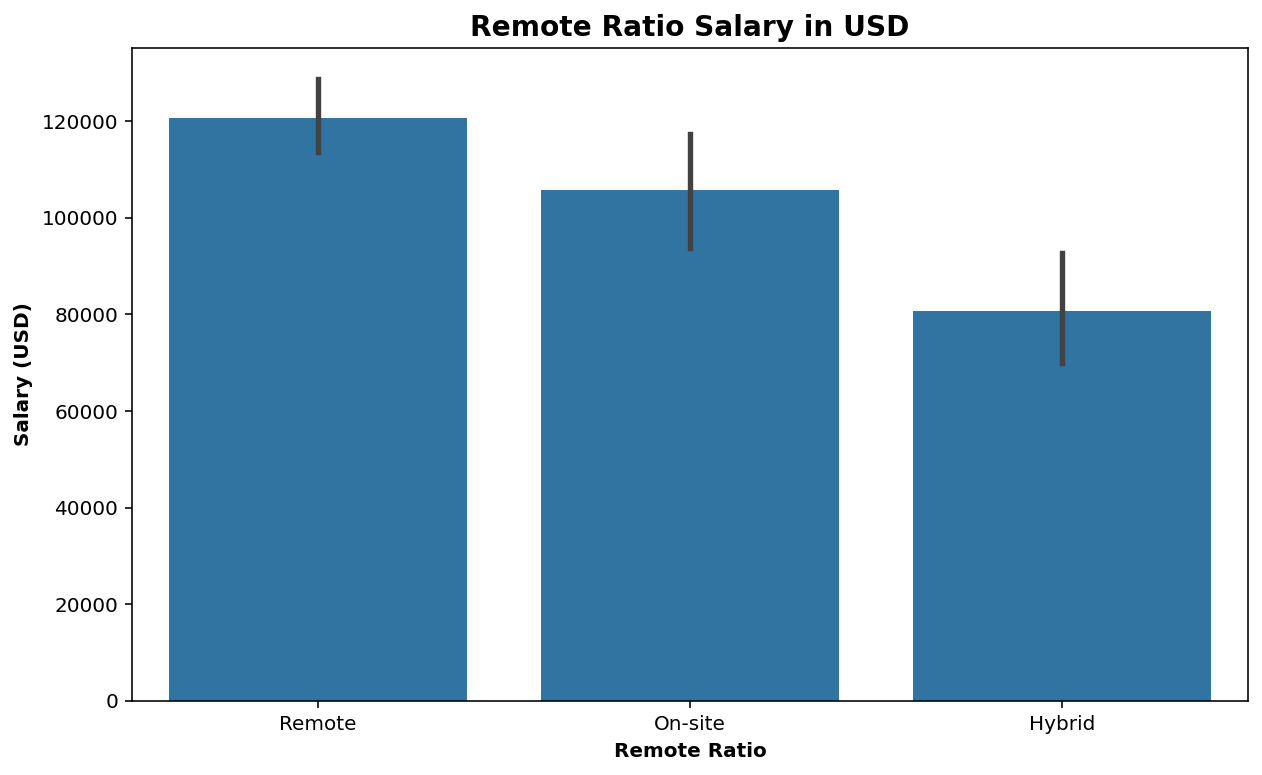

In [42]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.remote_ratio.value_counts().index
# Plot the bar chart of `remote_ratio` and 'salary_in_usd'
sns.barplot(data=df_clean, x='remote_ratio', y='salary_in_usd', color=color, order=order);
#set the title and label
x_y_t('Remote Ratio', 'Salary (USD)', 'Remote Ratio Salary in USD')

Remote employees earn more than on-site and hybrid employees.

## What is the relationship between Salary and Employment type?

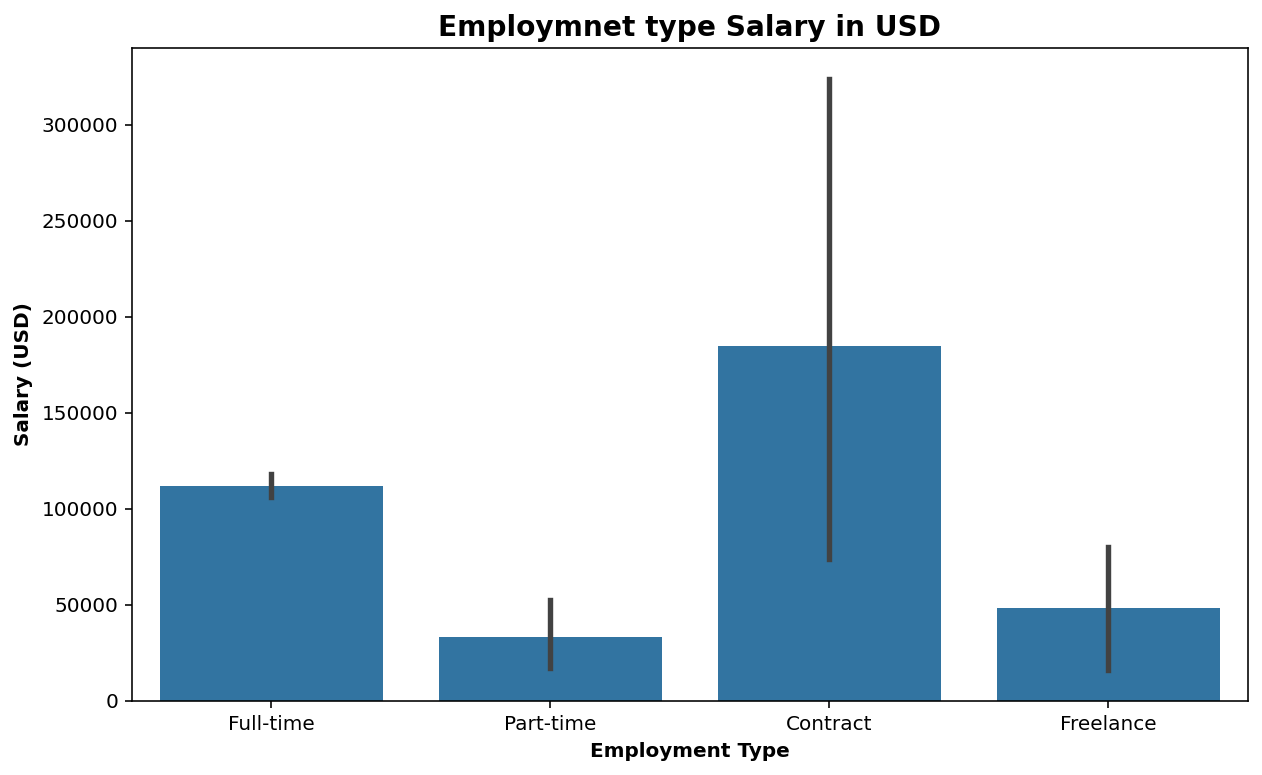

In [43]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.employment_type.value_counts().index
# Plot the bar chart of `employment_type` and 'salary_in_usd'
sns.barplot(data=df_clean, x='employment_type', y='salary_in_usd', color=color, order=order);
#set the title and label
x_y_t('Employment Type', 'Salary (USD)', 'Employmnet type Salary in USD')

Those who work full time earn more than part-time and freelance workers. In contract employmnet, there are a lot of variations.

## Is there a relationship between Company Size and Salary (USD)?

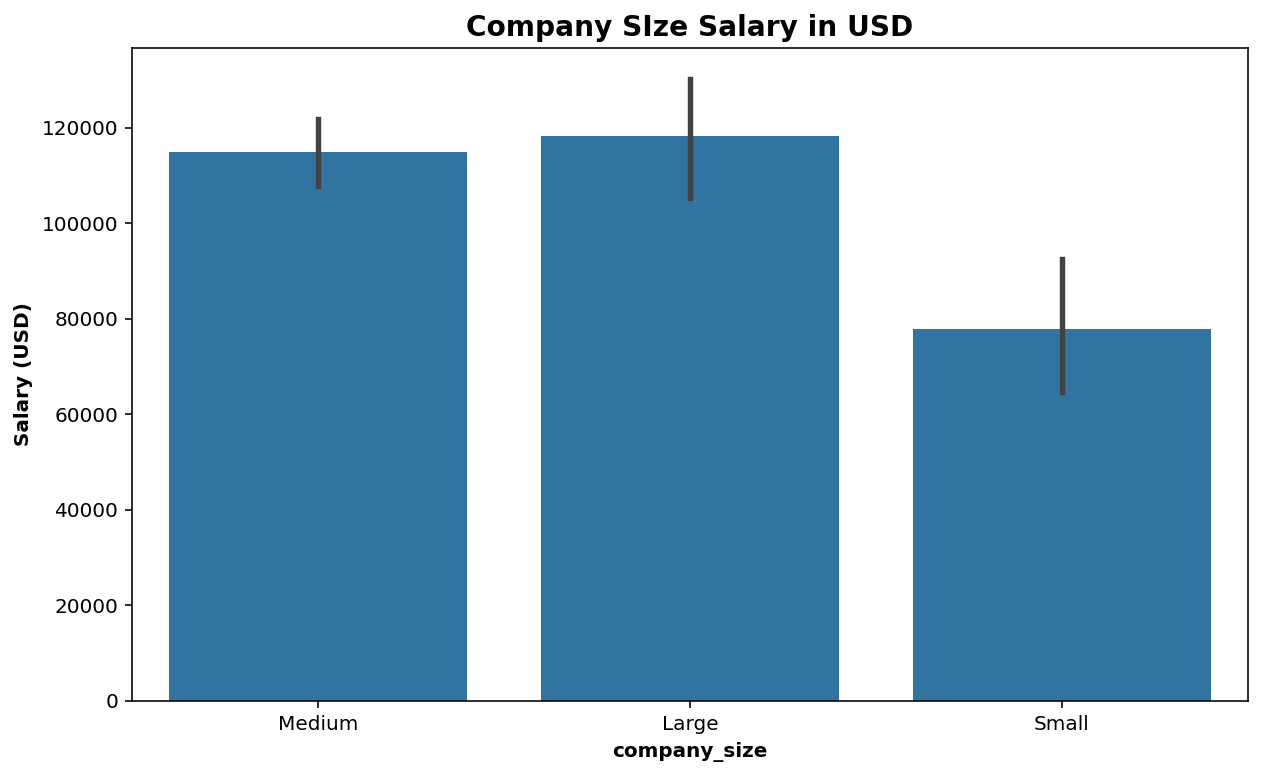

In [44]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.company_size.value_counts().index
# Plot the bar chart of `company_size` and 'salary_in_usd'
sns.barplot(data=df_clean, x='company_size', y='salary_in_usd', color=color, order=order);
#set the title and label
x_y_t('company_size', 'Salary (USD)', 'Company SIze Salary in USD')

Medium and Large companies pay almost the same salary while small companies pay less.

## What is the relationship between Employee Residence and Salary (USD)?

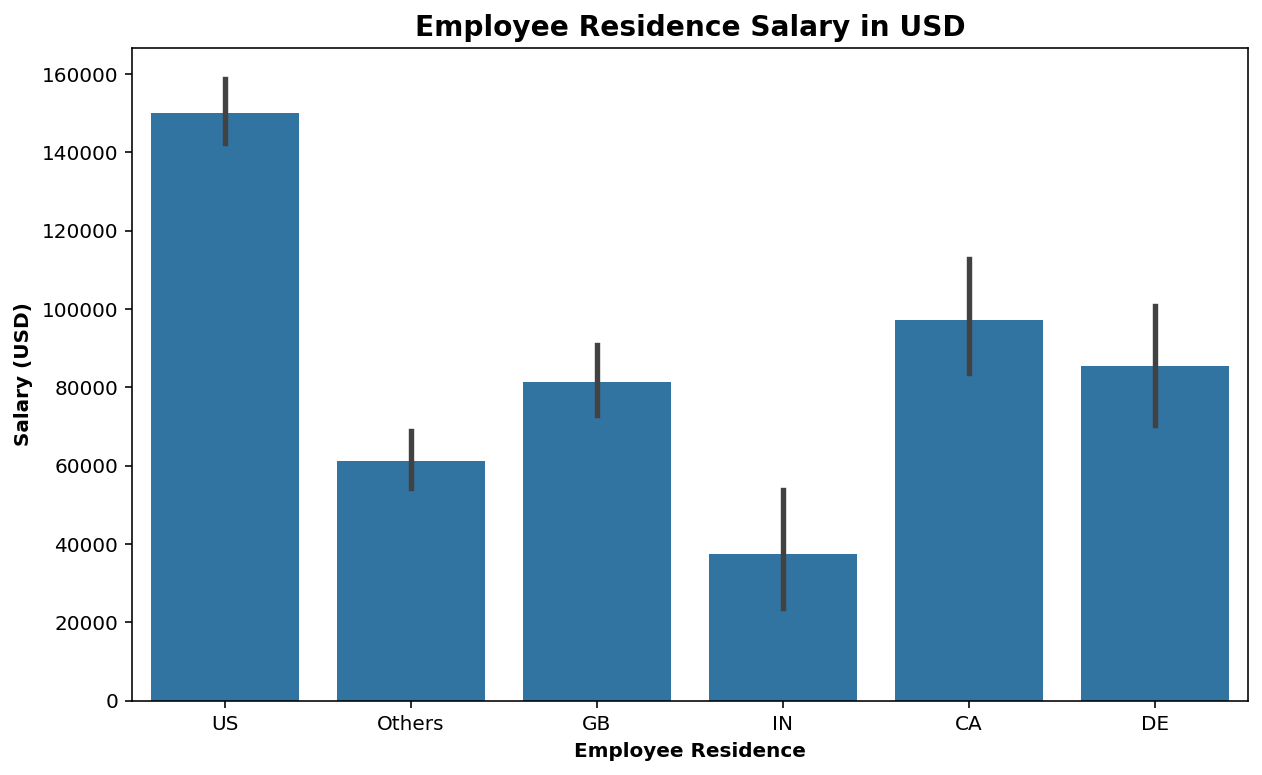

In [45]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.employee_residence.value_counts(5).index
# Plot the bar chart of `company_size` and 'salary_in_usd'
sns.barplot(data=df_clean, x='employee_residence', y='salary_in_usd', color=color, order=order);
#set the title and label
x_y_t('Employee Residence', 'Salary (USD)', 'Employee Residence Salary in USD')

Most of the employees in United States earn more than other employees in other locations.

# Observations
<li> As level of experience is increasing, so does salary. 
<li> Remote employees earn more which makes sense because most of the employees work from home.
<li> Full-time employees earn more than part-time workers. Contract workers earn a lot too but there is a lot of variations in contract employment which may be due to range of pay based on the contract.
<li> Large and medium companies pay more than small size companies, which can be due to the reason that large and medium size companies requires more employees as they handle more data than small size companies
<li> Employees in United states earn more than other employees in other locations. It makes sense when you take account of currency rate from other locations